The goal is to create a model that can recognize handwritten digits (0-9) from the MNIST dataset. The model will classify the images into one of the 10 digit categories (0, 1, 2, ..., 9).

In [1]:
!pip install tensorflow numpy matplotlib

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


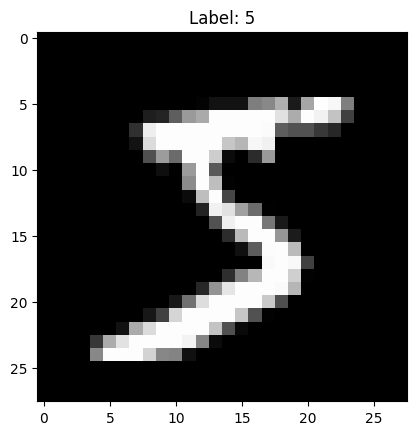

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Display the first image in the dataset
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show() 

In [3]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0  

# Reshape images to include the color channel (28, 28, 1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 output neurons for 10 digit classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.8269 - loss: 0.5402 - val_accuracy: 0.9831 - val_loss: 0.0532
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9589 - loss: 0.1371 - val_accuracy: 0.9854 - val_loss: 0.0478
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9718 - loss: 0.0940 - val_accuracy: 0.9869 - val_loss: 0.0415
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9761 - loss: 0.0799 - val_accuracy: 0.9905 - val_loss: 0.0300
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9809 - loss: 0.0656 - val_accuracy: 0.9897 - val_loss: 0.0340


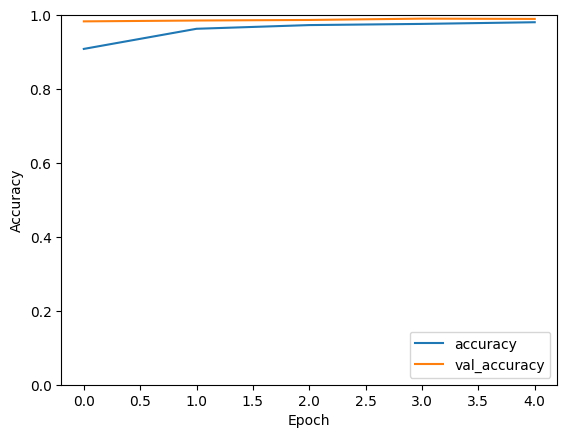

In [6]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


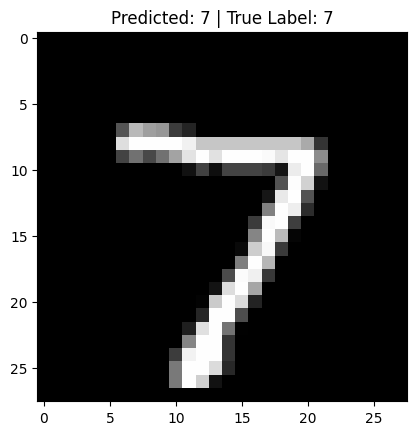

In [7]:
# Make predictions
predictions = model.predict(test_images)

# Display the first test image and the model's prediction
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predictions[0].argmax()} | True Label: {test_labels[0]}")
plt.show()

In [8]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9865 - loss: 0.0423
Test Accuracy: 98.97%
